In [40]:

main="/mnt/lab_data2/anusri/chrombpnet/"

chrombpnet_uncorrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/footprints_motifs_uncorrected/motif_footprints.h5"

hint_atac1=main+"results/chrombpnet/ATAC_PE/GM12878/ATAC_PE_05.13.2022_withnakedbias/chrombpnet_model/footprints_bias/motif_footprints.h5"
simple_bias1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_12.03.2022_1234_8_2114_0_hepg2_transfer_bias/chrombpnet_model/all_motifs_footprints_bias/motif_footprints.h5"
chrombpnet_corrected1=main+"results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/chrombpnet_model/all_motifs_footprints/motif_footprints.h5"




In [41]:
#uncorrected.keys()

In [42]:
import numpy as np
def normalize_marginal_footprints(input_f):
    for key in input_f:
        if key=="control":
            continue
        #input_f[key][0] = input_f[key][0] * (np.log(input_f[key][1]/input_f["control"][1]))
        #input_f[key][0] = input_f[key][0]

        #print(input_f[key][1], input_f["control"][1])
    return input_f

In [43]:
import deepdish

In [44]:

uncorrected = normalize_marginal_footprints(deepdish.io.load(chrombpnet_uncorrected1))

hint_atac = normalize_marginal_footprints(deepdish.io.load(hint_atac1))
chrombpnet = normalize_marginal_footprints(deepdish.io.load(chrombpnet_corrected1))
simple_bias = normalize_marginal_footprints(deepdish.io.load(simple_bias1))



In [45]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

In [52]:
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

def make_inset(input_array, main_axes, color, scale=None):
    x1 = 0
    x2 = 100

    input_array =input_array*1000
    # select y-range for zoomed region
    y1 = -0.01
    if scale is None:
        y2 = np.ceil(max(input_array))
    else:
        y2 = scale
    

    # Make the zoom-in plot:
    #  axins = zoomed_inset_axes(axs[i-1,3], 2, loc=1) # zoom = 2
    axins = inset_axes(main_axes, loc=1, width="50%", height=0.5) # zoom = 2

    axins.plot(input_array, c=color, alpha=0.8)
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    axins.set_xticks([80, 120])
    axins.set_yticks([0, np.round(y2,4)])

    

    #axins.tick_params(axis='both', which='minor', labelsize=8)

    plt.xticks(visible=False)
    plt.yticks(visible=True)

    #mark_inset(main_axes, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth=0.1, linestyle="--")
    plt.locator_params(axis='y', nbins=2)


    plt.draw()
    
    return y2
    

In [53]:
hint_atac.keys()

dict_keys(['K562_BIAS_metacluster_0_pattern_0', 'K562_BIAS_metacluster_0_pattern_1', 'K562_BIAS_metacluster_0_pattern_2', 'K562_BIAS_metacluster_0_pattern_3', 'K562_BIAS_metacluster_0_pattern_4', 'control'])

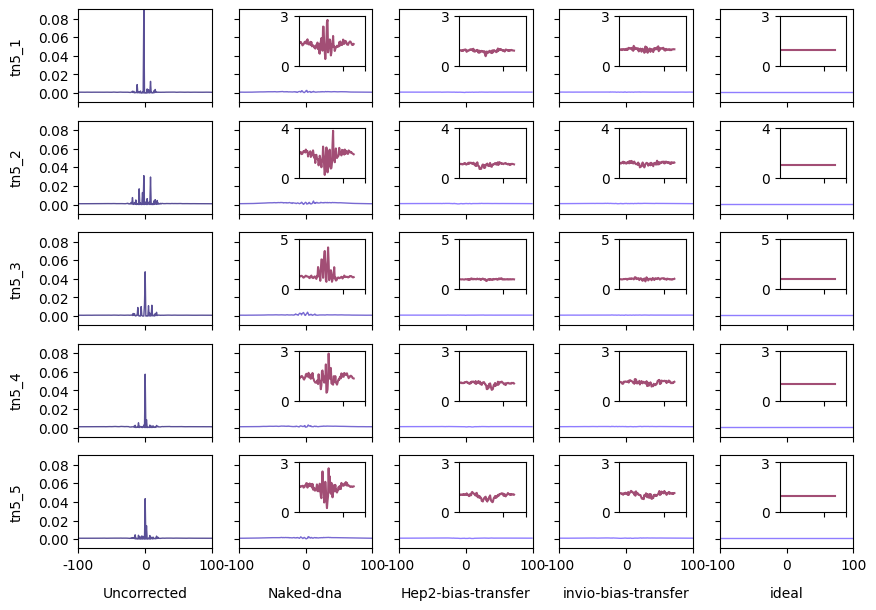

In [61]:
fig,axs = plt.subplots(5,5,figsize=(10,7),sharex=True,sharey=True)
plt.style.use('default')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

values = []

keyd="K562_BIAS_metacluster_0_pattern"
for i in range(0,5):
    axs[i,0].plot(uncorrected[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="uncorrected", c="#473C8B",linewidth=1)
    axs[i,1].plot(hint_atac[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="hint-atac", c="#6959CD",linewidth=1)
    axs[i,2].plot(simple_bias[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="chrombpnet", c="#836FFF",linewidth=1)
    axs[i,3].plot(chrombpnet[keyd+"_"+str(i)][0][400:600], alpha=0.9, label="simple-bias", c="#836FFF",linewidth=1)
    axs[i,4].plot(np.array([0.001]*200), alpha=0.9, label="Baseline", c="#836FFF",linewidth=1)

    y2 = make_inset(hint_atac[keyd+"_"+str(i)][0][450:550], axs[i,1], "#8B2252", scale=None)
    y3 = make_inset(simple_bias[keyd+"_"+str(i)][0][450:550], axs[i,2], "#8B2252", scale=y2)
    y3 = make_inset(chrombpnet[keyd+"_"+str(i)][0][450:550], axs[i,3], "#8B2252",y2)
    y3 = make_inset(np.array([0.001]*100), axs[i,4], "#8B2252",y2)
    #print([0.001]*100,)
    values.append([np.max(uncorrected[keyd+"_"+str(i)][0]), np.max(hint_atac[keyd+"_"+str(i)][0]), np.max(simple_bias[keyd+"_"+str(i)][0]), np.max(chrombpnet[keyd+"_"+str(i)][0]), 0.001 ])

    axs[i,0].set_ylim([-0.01, 0.09])
    axs[i,1].set_ylim([-0.01, 0.09])
    axs[i,2].set_ylim([-0.01, 0.09])
    axs[i,3].set_ylim([-0.01, 0.09])
    
    axs[i,0].set_xlim([0, 100])
    axs[i,1].set_xlim([0, 100])
    axs[i,2].set_xlim([0, 100])
    axs[i,3].set_xlim([0, 100])
    
    axs[i,0].set_yticks([0,0.02,0.04,0.06,0.08])
    axs[i,0].set_xticks([0,100,200])
    axs[i,0].set_xticklabels([-100,0,100])

    #axs[0,i-1].tick_params(axis='both', which='minor', labelsize=15)

models = ["Uncorrected", "Naked-dna", "Hep2-bias-transfer", "invio-bias-transfer", "ideal"]
motifs = ["tn5_1", "tn5_2", "tn5_3", "tn5_4", "tn5_5"]


for ax, col in zip(axs[:,0], motifs):
    ax.set_ylabel(col, rotation=90, labelpad=10, fontsize=10)

for ax, row in zip(axs[-1], models):
    ax.set_xlabel(row, rotation=0, labelpad=10, fontsize=10)

plt.savefig("marginal_footprints/comparing_naked_invivo_tn5.pdf", transparent=True, dpi=300)
